## Imports

In [1]:
# can be used to install archtype analysis
import sys
# !pip install py_pcha

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha

import warnings
warnings.filterwarnings('ignore')

## Load dataset

Number of spectres: 231
Number of features in each spectre: 6998


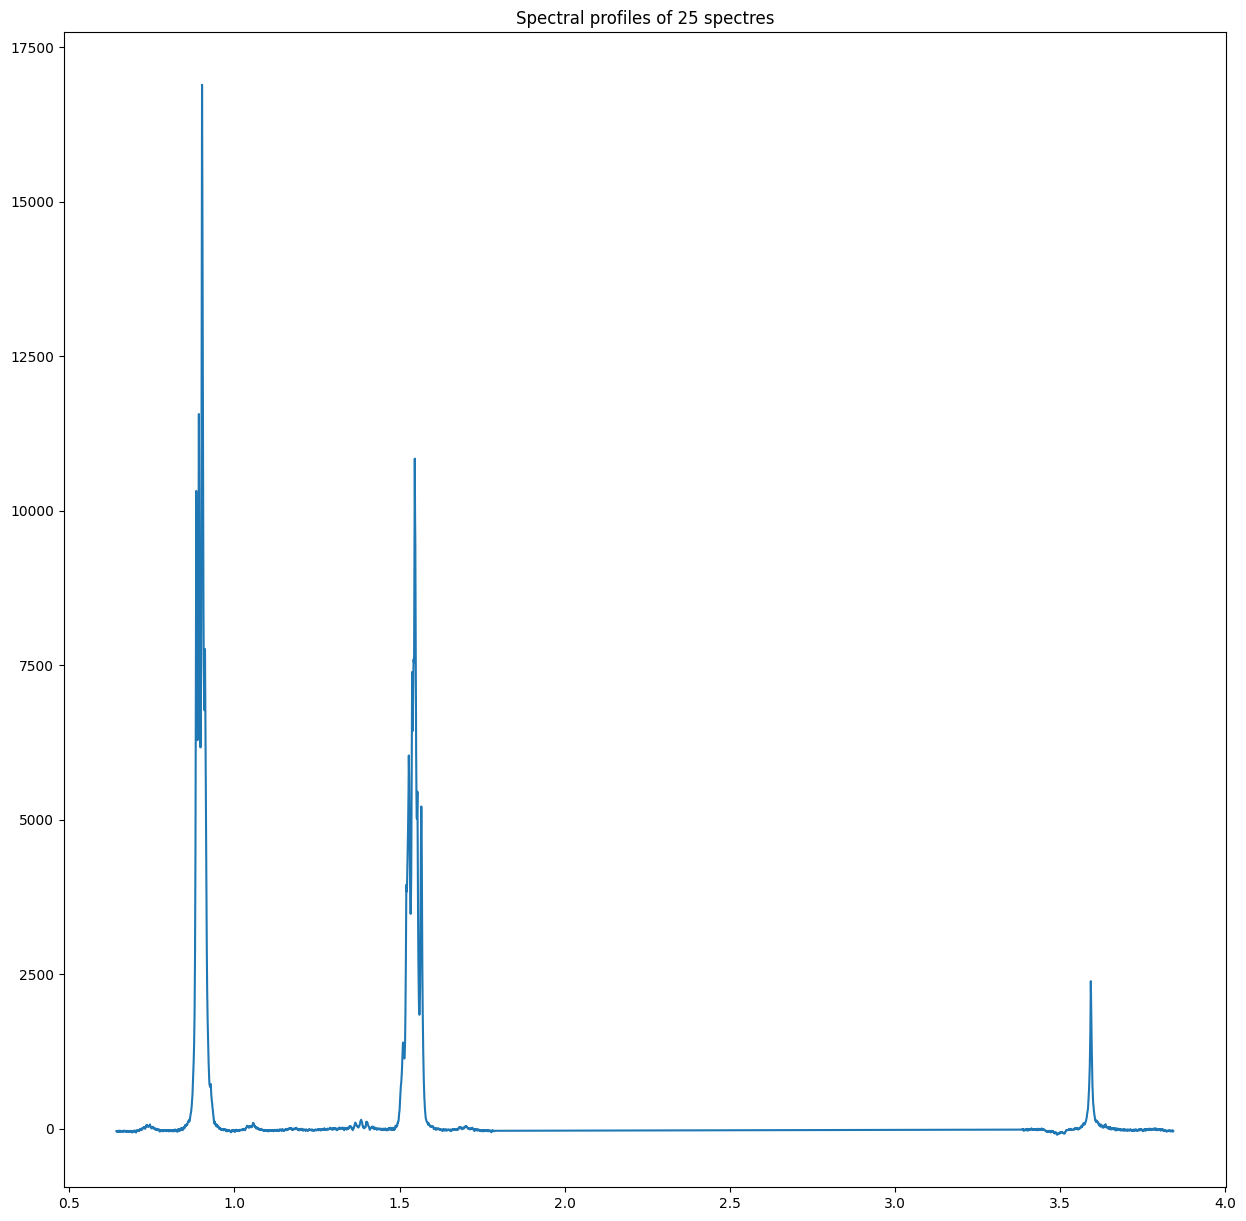

In [25]:
path = Path().cwd()

data_path = path.parent / "Matlab" / "Data" / "NMR_mix_DoEcompressed.mat"
mat = scipy.io.loadmat(data_path)

X = mat['xData']
y = mat['yData']
Xaxis = mat['Axis']

n, p = np.shape(X.T)

print(f'Number of spectres: {n}')
print(f'Number of features in each spectre: {p}')

fig, ax = plt.subplots(figsize=(15,15))
# _ = ax.plot(Xaxis, X[:,np.random.choice(X.shape[1], 1, replace=False)])
_ = ax.plot(Xaxis, np.min(X,axis = 1))

_ = ax.set_title('Spectral profiles of 25 spectres')

In [24]:
np.min(X,axis = 1).shape

(6998,)

> Which of the methods: SVD, NMF, Archetypical Analysis (AA), Sparse Coding (SC), Non-negative Sparse Coding
(NSC), ICA, and K-meansdo you think will be the most suited for recovering the underlying concentrations of the
three alcohols in the samples? Verify the method is indeed performing well by comparing the
estimated concentrations by the model to the actual concentrations given in the variable
yData.

In [6]:
n_components = 3
XC, S, C, SSE, varexpl = py_pcha.PCHA(X, noc=n_components, delta=0.1)

H = S
W = XC

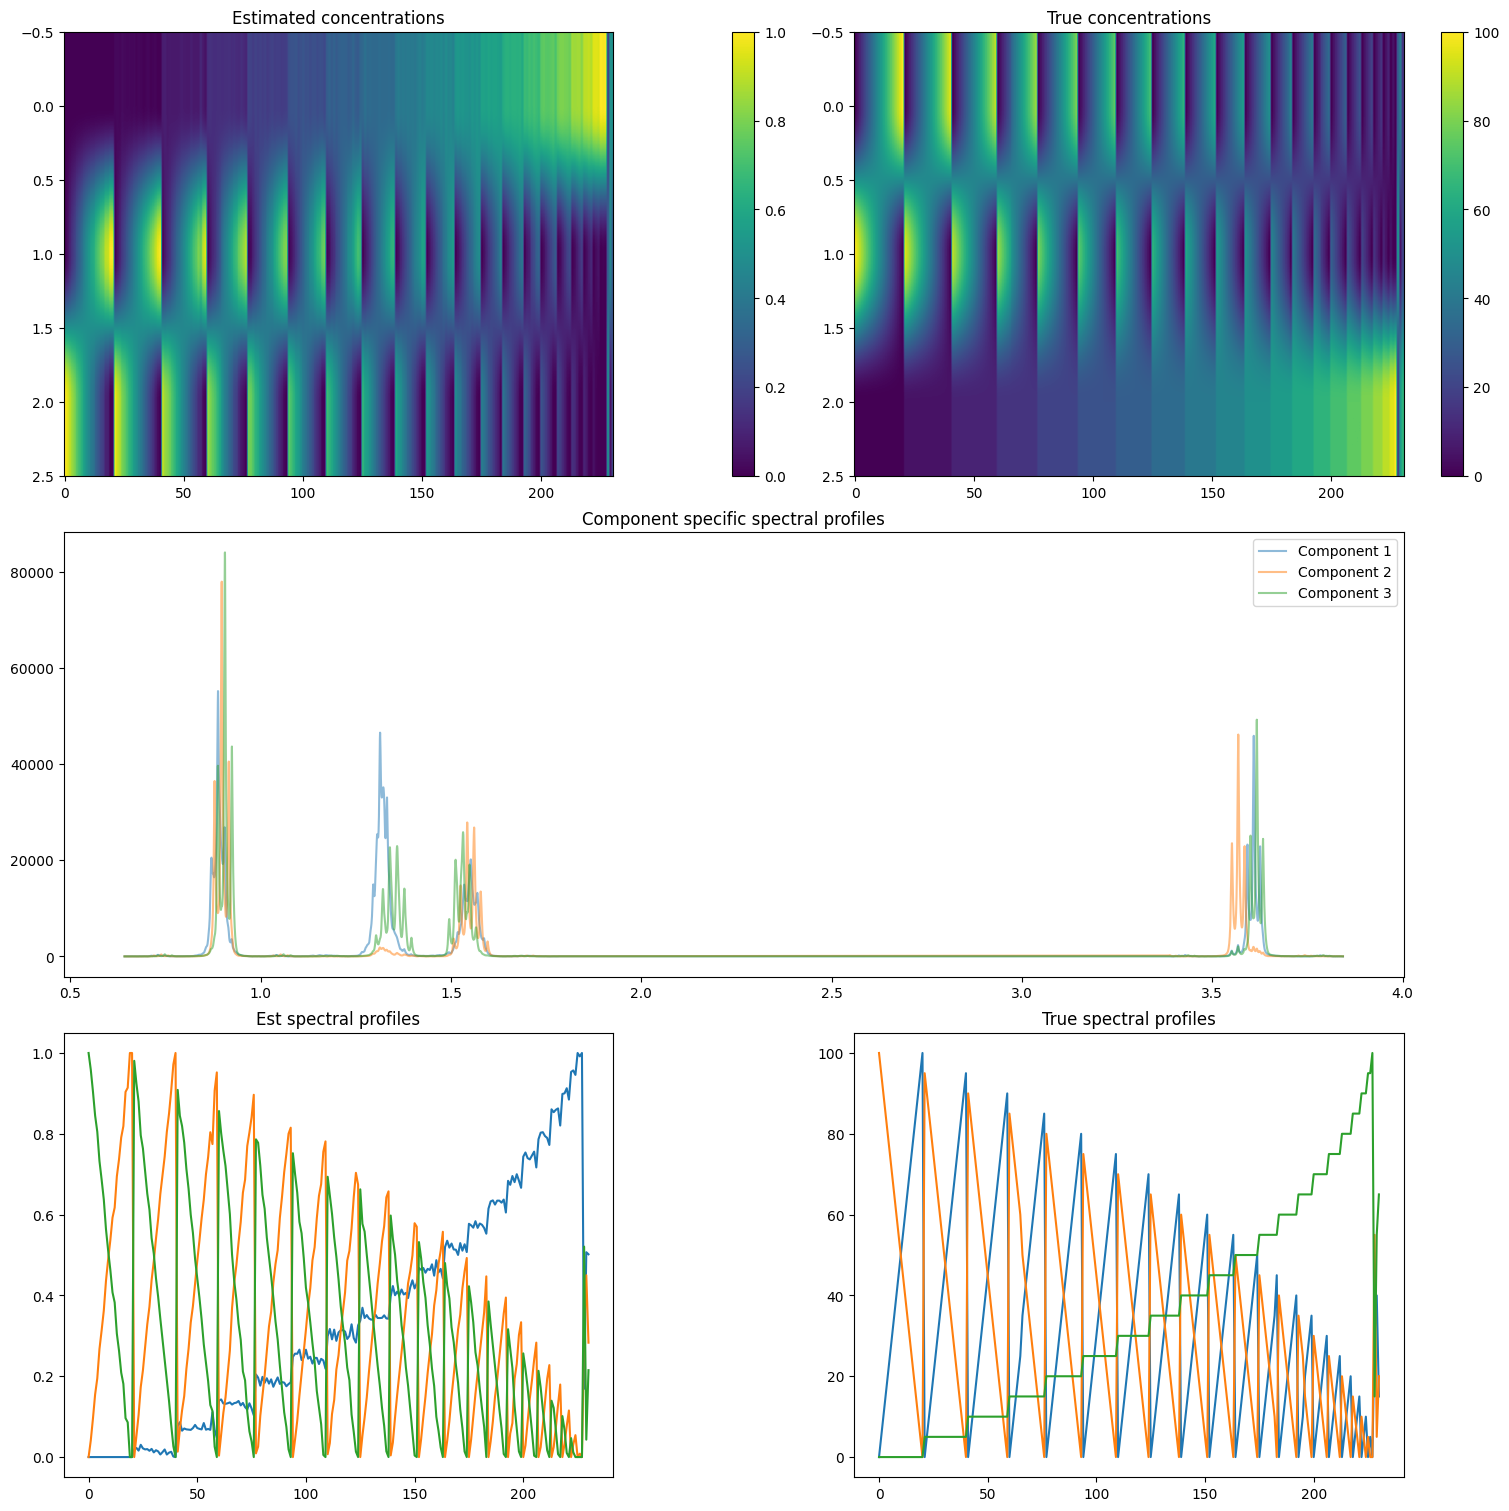

In [75]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Estimated concentrations')
im1 = ax1.imshow(H, aspect='auto')
fig.colorbar(im1)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('True concentrations')
im2 = ax2.imshow(y, aspect='auto')
fig.colorbar(im2)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('Component specific spectral profiles')
ax3.plot(Xaxis, W, alpha=0.5)
_ = ax3.legend(['Component 1','Component 2','Component 3'])

ax4 = fig.add_subplot(gs[2, 0])
ax4.set_title("Est spectral profiles")
ax4.plot(H.T);
 
ax5 = fig.add_subplot(gs[2, 1])
ax5.set_title("True spectral profiles")
ax5.plot(y.T);

In [35]:
W.shape, H.shape

((6998, 3), (3, 231))

In [16]:
y.shape, Xaxis.shape

((3, 231), (6998, 1))

In [17]:
X.shape

(6998, 231)

In [83]:
model = decomposition.FastICA(n_components=n_components,algorithm='parallel')
X_transformed = abs(model.fit_transform(X))
X_hat = np.dot(X_transformed, model.mixing_.T) + model.mean_
# L = 0.5*np.linalg.norm(X-X_hat)**2
M = abs(model.mixing_) / np.sum(abs(model.mixing_), axis=1)[:,None]

In [84]:
X_hat.shape, X_transformed.shape, W.shape, H.shape, M.shape

((6998, 231), (6998, 3), (6998, 3), (3, 231), (231, 3))

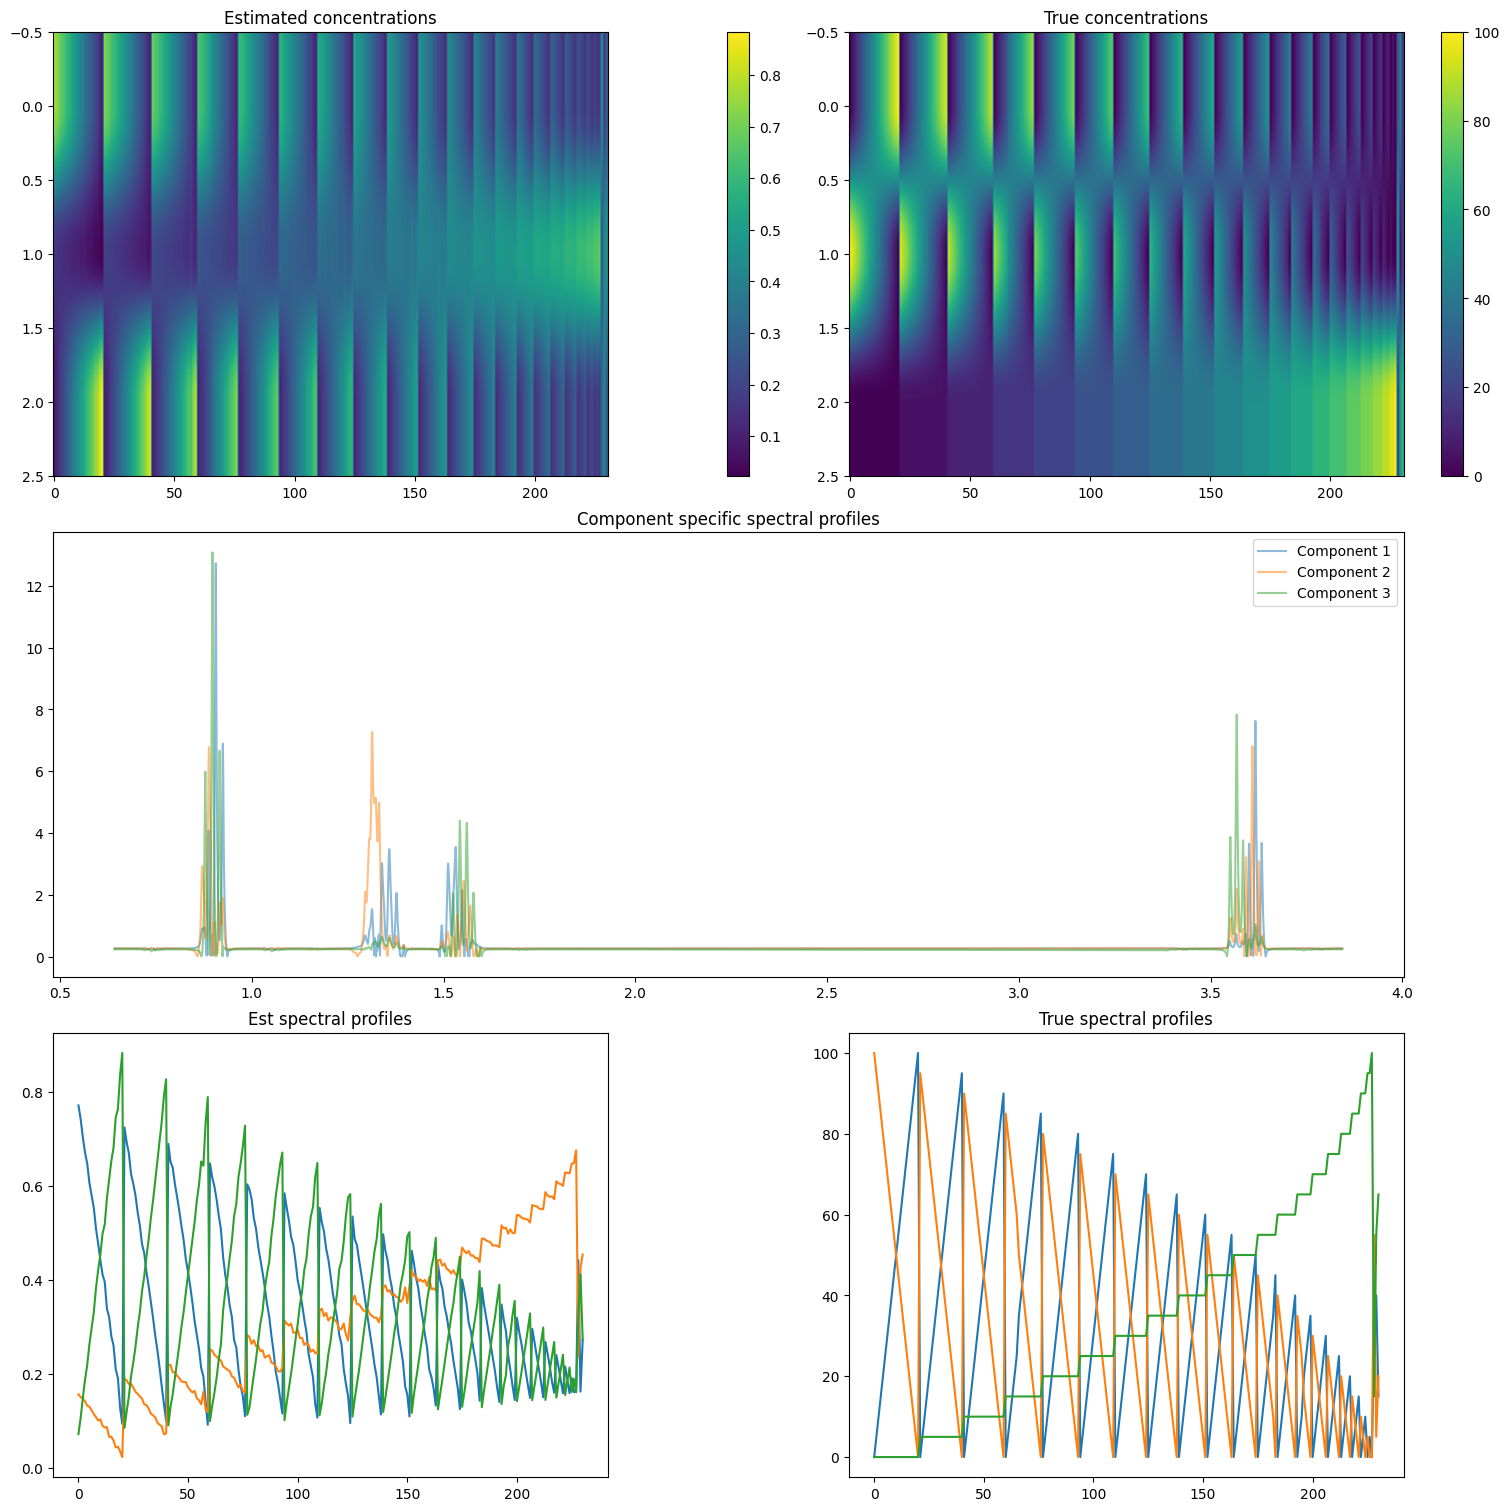

In [85]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Estimated concentrations')
im1 = ax1.imshow(M.T, aspect='auto')
fig.colorbar(im1)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('True concentrations')
im2 = ax2.imshow(y, aspect='auto')
fig.colorbar(im2)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('Component specific spectral profiles')
ax3.plot(Xaxis, X_transformed, alpha=0.5)
_ = ax3.legend(['Component 1','Component 2','Component 3'])

ax4 = fig.add_subplot(gs[2, 0])
ax4.set_title("Est spectral profiles")
ax4.plot(M);
 
ax5 = fig.add_subplot(gs[2, 1])
ax5.set_title("True spectral profiles")
ax5.plot(y.T);

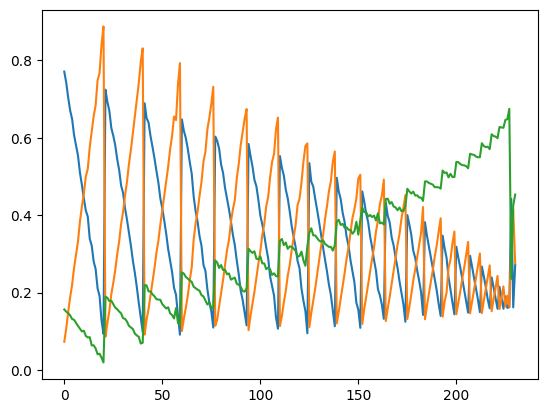

In [ ]:
plt.plot();

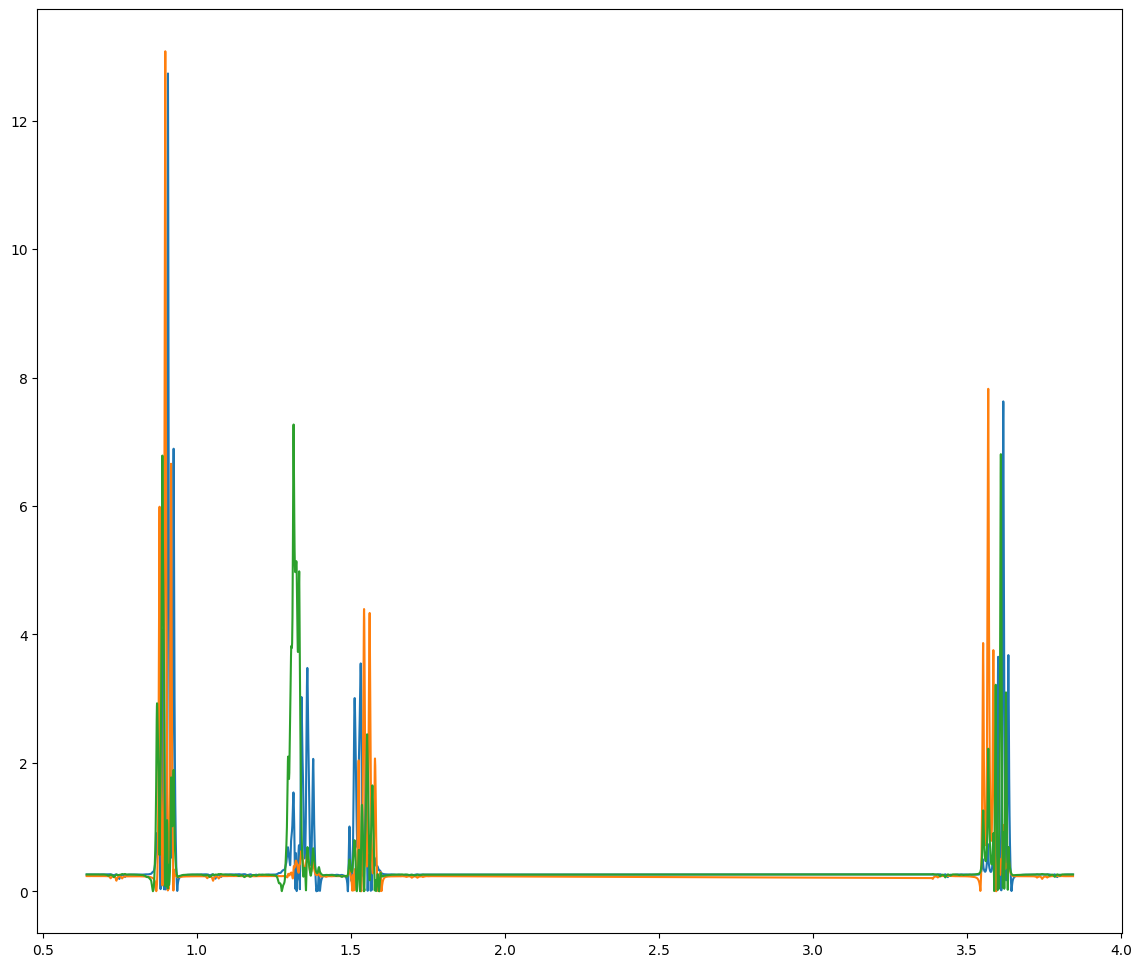

In [74]:
plt.figure(figsize=(14,12))
plt.plot(Xaxis, abs(X_transformed));